#Health Insurance Lead Prediction

Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)
Information regarding holding policies of the customer
Recommended Policy Information

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
upload = files.upload()

Saving train_Df64byy.csv to train_Df64byy.csv


In [69]:
# Reading the training data
import io
df = pd.read_csv(io.BytesIO(upload['train_Df64byy.csv']))
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [70]:
# This will give additional information about the train dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [38]:
# This will show the number of null values in each feature
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [8]:
# Below mentioned features have more null values. As per Data description table,
  # Health Indicator: Encoded values for health of the customer
  # Holding_Policy_Duration : Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)
  # Holding_Policy_Type : Type of holding policy
  # 23% of Health Indicator & 39% of Holding_Policy_Duration, Holding_Policy_Type are NULL values

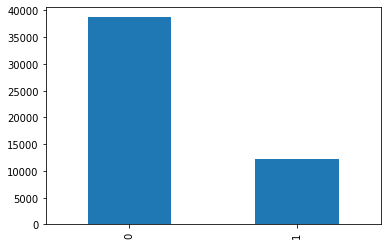

In [9]:
# 0 : Customer did not show interest in the recommended policy,
# 1 : Customer showed interest in the recommended policy
df.Response.value_counts().plot(kind='bar')

In [11]:
#This gives the City_Code classes and their counts
df.City_Code.value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [12]:
#This gives the Region_Code classes and their counts
df.Region_Code.value_counts()

1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64

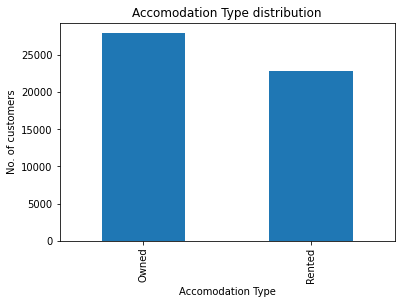

In [13]:
df.Accomodation_Type.value_counts().plot(kind='bar')
plt.xlabel("Accomodation Type") 
plt.ylabel("No. of customers") 
plt.title("Accomodation Type distribution") 
plt.show() 

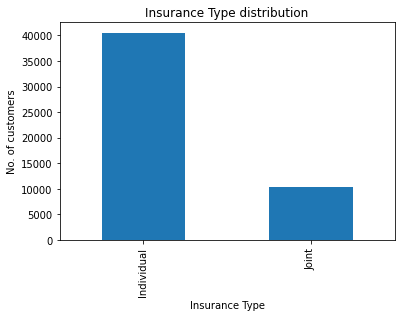

In [14]:
df.Reco_Insurance_Type.value_counts().plot(kind='bar')
plt.xlabel("Insurance Type") 
plt.ylabel("No. of customers") 
plt.title("Insurance Type distribution") 
plt.show() 

In [15]:
# Both  City_Code & Region_Code are encoded already. No Null values in these features.
# Accomodation_Type has 2 classes with pretty good distribution
# 23% of Health Indicator & 39% of Holding_Policy_Duration, Holding_Policy_Type are NULL values

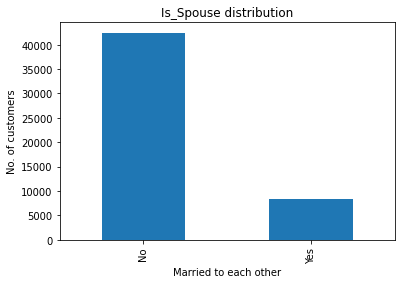

In [16]:
df.Is_Spouse.value_counts().plot(kind='bar')
plt.xlabel("Married to each other") 
plt.ylabel("No. of customers") 
plt.title("Is_Spouse distribution") 
plt.show() 

Null values % is 0.2297669116780001


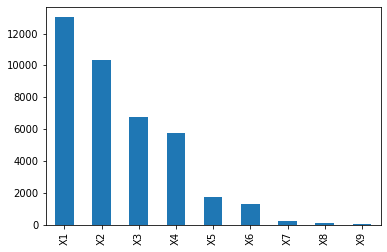

In [39]:
df['Health Indicator'].value_counts().plot(kind='bar')
print('Null values % is', df['Health Indicator'].isnull().sum()/df.shape[0])

Null values % is 0.3979992924806415


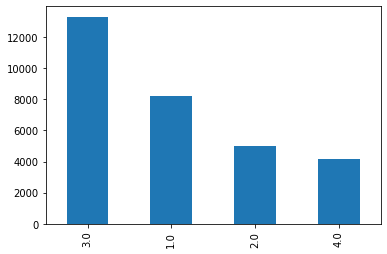

In [40]:
df['Holding_Policy_Type'].value_counts().plot(kind='bar')
print('Null values % is', df['Holding_Policy_Type'].isnull().sum()/df.shape[0])

Null Values % is 0.0


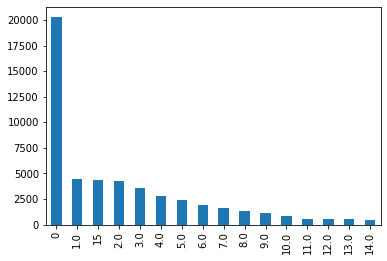

In [76]:
df['Holding_Policy_Duration'].value_counts().plot(kind='bar')
print('Null Values % is', df['Holding_Policy_Duration'].isnull().sum()/df.shape[0])

In [22]:
# Feature Engineering #1
  #Drop ID, City_Code, Region_Code
  # Do OHE on Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Reco_Policy_Cat
  # Impute values using KNNImputer in Health Indicator, Holding_policy_Duration, holding_policy_Type
  # Do a standard scaler before feeding to model

In [71]:
# With a hypothesis that, customers without holding policy would not give values for holding policy columns so filling with  0
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(value='0')
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna(value=0)

In [72]:
df['Health Indicator']= df['Health Indicator'].fillna(value='X0')

In [73]:
df.drop(['ID', 'Region_Code'], axis=1, inplace=True)

In [74]:
df['Holding_Policy_Duration'].replace(to_replace='14+', value='15', inplace=True)

In [77]:
df["Holding_Policy_Duration"] = pd.to_numeric(df["Holding_Policy_Duration"], downcast="float")

In [78]:
df['Holding_Policy_Type']=df['Holding_Policy_Type'].astype(str)
df['Reco_Policy_Cat']=df['Reco_Policy_Cat'].astype(str)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Accomodation_Type        50882 non-null  object 
 2   Reco_Insurance_Type      50882 non-null  object 
 3   Upper_Age                50882 non-null  int64  
 4   Lower_Age                50882 non-null  int64  
 5   Is_Spouse                50882 non-null  object 
 6   Health Indicator         50882 non-null  object 
 7   Holding_Policy_Duration  50882 non-null  float32
 8   Holding_Policy_Type      50882 non-null  object 
 9   Reco_Policy_Cat          50882 non-null  object 
 10  Reco_Policy_Premium      50882 non-null  float64
 11  Response                 50882 non-null  int64  
dtypes: float32(1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [84]:
df1=df

In [86]:
label = df1.pop('Response')

In [88]:
df1_dum= pd.get_dummies(df1, columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat'])

In [89]:
df1_dum.shape

(50882, 83)

In [90]:
df1_dum.head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,...,Reco_Insurance_Type_Joint,Is_Spouse_No,Is_Spouse_Yes,Health Indicator_X0,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_0,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_1,Reco_Policy_Cat_10,Reco_Policy_Cat_11,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_2,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22,Reco_Policy_Cat_3,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9
0,36,36,15.0,11628.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,75,22,0.0,30510.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,32,32,1.0,7450.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,52,48,15.0,17780.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,44,44,3.0,10404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1_dum)                                                                                   # fit the data to Standardscaler
df1_scale = sc.transform(df1_dum)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(df1_scale, columns=df1_dum.columns).head())  

After standardizing our features, the first 5 rows of our data now look like this:

   Upper_Age  Lower_Age  ...  Reco_Policy_Cat_8  Reco_Policy_Cat_9
0  -0.511625  -0.389098  ...          -0.124447          -0.125502
1   1.741395  -1.197449  ...          -0.124447          -0.125502
2  -0.742704  -0.620055  ...          -0.124447          -0.125502
3   0.412691   0.303775  ...          -0.124447          -0.125502
4  -0.049467   0.072817  ...          -0.124447          -0.125502

[5 rows x 83 columns]


In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df1_scale,label,test_size=0.10, random_state=42, stratify=label)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
dclf=DecisionTreeClassifier()

# here we are using hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dtf',dclf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [98]:
from sklearn.metrics import accuracy_score
print('Accuracy scores are : ')
for clf in (log_clf, rnd_clf, dclf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(' roc_auc_scores are : ')
for clf in (log_clf, rnd_clf, dclf, voting_clf):
  clf.fit(X_train, y_train)
  print(clf.__class__.__name__, roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) 


Accuracy scores are : 
LogisticRegression 0.7592847317744154
RandomForestClassifier 0.7449400668107683
DecisionTreeClassifier 0.6655531538612695
VotingClassifier 0.7013165651404991
 roc_auc_scores are : 
LogisticRegression 0.6187134064590114
RandomForestClassifier 0.6352664124122244
DecisionTreeClassifier 0.5384076023941587
VotingClassifier 0.6277418953220402


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

xg_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=42).fit(X_train, y_train)
#xg_clf.score(X_test, y_test)
print(xg_clf.__class__.__name__, roc_auc_score(y_test, xg_clf.predict_proba(X_test)[:, 1]))

GradientBoostingClassifier 0.6170397270448976


In [ ]:
# Processing Test Data to fit for a model

In [100]:
upload2 = files.upload()

Saving test_YCcRUnU.csv to test_YCcRUnU.csv


In [101]:
df_test=pd.read_csv(io.BytesIO(upload2['test_YCcRUnU.csv']))

In [102]:
df_test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [103]:
df_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [105]:
df_test['Holding_Policy_Type']=df_test['Holding_Policy_Type'].fillna(value='0')
df_test['Holding_Policy_Duration']=df_test['Holding_Policy_Duration'].fillna(value=0)
df_test['Health Indicator']= df_test['Health Indicator'].fillna(value='X0')
df_test.drop(['ID', 'Region_Code'], axis=1, inplace=True)
df_test['Holding_Policy_Duration'].replace(to_replace='14+', value='15', inplace=True)
df_test["Holding_Policy_Duration"] = pd.to_numeric(df_test["Holding_Policy_Duration"], downcast="float")
df_test['Holding_Policy_Type']=df_test['Holding_Policy_Type'].astype(str)
df_test['Reco_Policy_Cat']=df_test['Reco_Policy_Cat'].astype(str)

In [106]:
df_test.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,Owned,Individual,30,30,No,X0,6.0,3.0,5,11934.0
1,C4,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,C1,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,C3,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,C1,Owned,Individual,75,75,No,X3,0.0,0,5,22534.0


In [107]:
df_test_dum= pd.get_dummies(df_test, columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat'])

In [108]:
sc.fit(df_test_dum)                                                                                   # fit the data to Standardscaler
df_test_scale = sc.transform(df_test_dum)                                                               # transform the data


In [109]:
test_sub=rnd_clf.predict(df_test_dum)

In [110]:
from google.colab import files
pd.DataFrame(test_sub).to_csv('test_subm_rnd3.csv') 
files.download('test_subm_rnd3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(test_sub)